# **Introduction to OpenCV with Python**

## **Basic Image Operations**
Now that we have installed OpenCV on our workstations, let's get our hands dirty with some of the functionalities that OpenCV offers.

### **Display an Image**

In [ ]:
import cv2

img = cv2.imread('Trump.jpg')
cv2.imshow('Trump_Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

The **`waitKey`** command will wait for you to press a key before it moves on to the next command. This is useful so that the program will continue to display your image until a key is pressed, otherwise it will be displayed for a split second and then quickly disappear once the program has stopped executing.

### **Saving an Image**

Saving an image is a very commonly used feature, as we may need to update our image and save the changes to the file system for later use. OpenCV has an cv2.imwrite() function to save images.

In [ ]:
import cv2

img = cv2.imread('Trump.jpg')

cv2.imwrite('Trump_Frame.png', img)
cv2.imwrite('Trump_Frame.jpg',img)

## **Arithmetic Operations on Images**


### **Adding Images**

In [ ]:
import cv2

# Read in the two images
image_1 = cv2.imread('img_1.jpg')
image_2 = cv2.imread('img_2.jpg')

# Sum the two image arrays for all channels
result = cv2.add(image_1, image_2)

cv2.imshow('result', result)
cv2.waitKey()
cv2.destroyAllWindows()

### **Blending Images**


In [ ]:
import cv2

# Read in the two images
image_1 = cv2.imread('img_1.jpg')
image_2 = cv2.imread('Img_2.jpg')

result = cv2.addWeighted(image_1, 0.8, image_2, 0.2,0)

cv2.imshow('result', result)
cv2.waitKey(0)        # Wait for the user to press a key before continuing
cv2.destroyAllWindows()

### **Image Smoothing**



In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('images.png')

# Filter by passing image through 3x3 averaging filter
average_image = cv2.blur(original_image,(9,9))

# Apply 3x3 gaussian filter on the original image
gaussian_image = cv2.GaussianBlur(original_image,(9,9),0)

fig, ax = plt.subplots(1,3, figsize = (13,13))

ax[0].imshow(original_image)
ax[0].set_title('Original')

ax[1].imshow(gaussian_image)
ax[1].set_title('Gaussian')

ax[2].imshow(average_image)
ax[2].set_title('Averaging')

plt.show()

## **Image Transformations**

### **Scaling**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images.png',cv2.IMREAD_UNCHANGED)
print('Original Dimensions : ',image.shape)

cv2.imshow("original image", image)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2

image = cv2.imread('images.png')
scale_percent = 40 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
print('resized Dimensions : ',resized.shape)

# Display the resulting images
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

### **Rotation**


In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the image of a bike
image = cv2.imread('images.png')

# Rows and columns
r, c,d = image.shape

matrix = cv2.getRotationMatrix2D((c/2,r/2), 180, 1)
result = cv2.warpAffine(image,matrix,(c,r))

# Display resulting rotation
plt.imshow(result)
plt.show()

## Image Filters

Image filters are used to reduce the amount of noise in an image and to enhance the edges in an image. There are two types of noise that can be present in an image: **`speckle noise`** and **`salt-and-pepper noise`**. **`Speck noise`** is the noise that occurs during image acquisition **`while salt-and-pepper noise`** (which refers to sparsely occurring white and black pixels) is caused by sudden disturbances in an image signal. Enhancing the edges of an image can help a model detect the features of an image.

For Python, the **Open-CV** and **PIL packages** allow you to apply several digital filters. Applying a digital filter involves taking the convolution of an image with a kernel (a small matrix). A kernal is an n x n square matrix were n is an odd number. 

### 1. Mean Filter



In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

image = cv2.imread('Trump.JPG') # reads the image

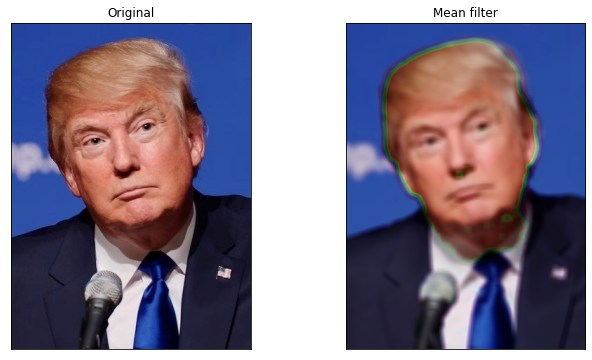

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
 
new_image = cv2.blur(image,(9, 9)) # 9*9 the dimension of the x and y axis of the kernal.

plt.figure(figsize=(11,6))

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

Above figure shows that while some of the **speckle noise** has been reduced there are a number of artifacts that are now present in the image that were not there previously. We can check to see if any artifacts are created when a mean filter is applied to a gray scale image.

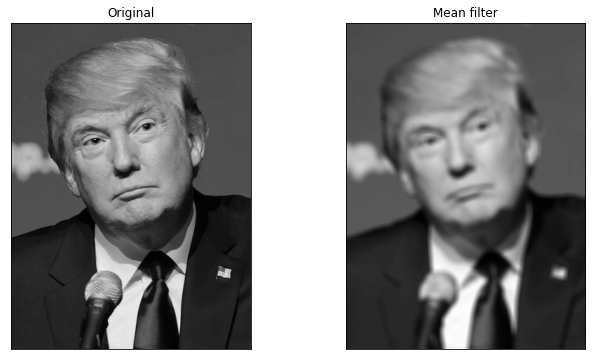

In [6]:
# The image will first be converted to grayscale

image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

Above Figure shows that mean filtering removes some of the noise and does not create artifacts for a grayscale image. However, some detail has been lost.

### 2. Gaussian Filter


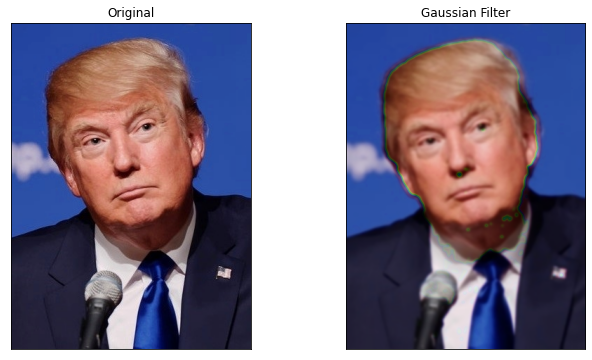

In [7]:
#Gaussian Filter

new_image = cv2.GaussianBlur(image, (9, 9),0)
plt.figure(figsize=(11,6))

plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

Above Figure shows that the Gaussian Filter does a better job of retaining the edges of the image when compared to the mean filter however it also produces artifacts on a color image. We can now check to see if the Gaussian filter produces artifacts on a grayscale image.

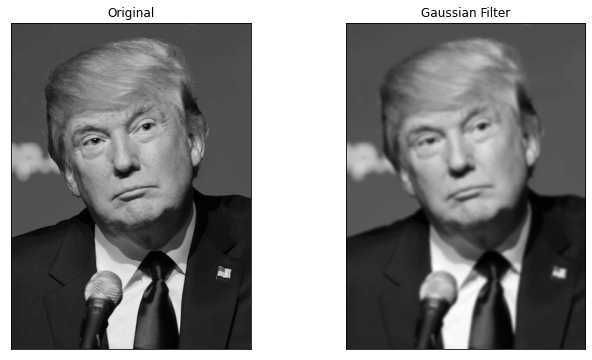

In [8]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

Above Figure shows that a 9 x 9 Gaussian filter does not produce artifacts when applied to a grayscale image. The filter can retain more detail than a 9 x 9 mean filter and remove some noise.

### 3. Median Filter



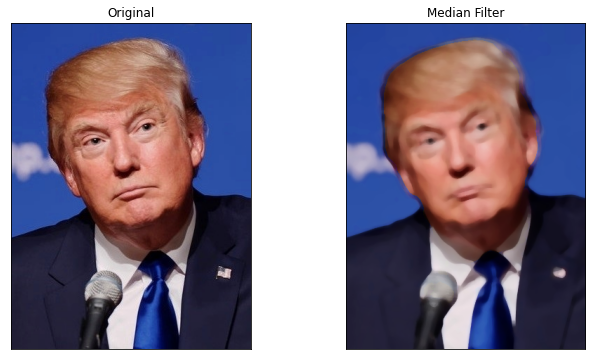

In [9]:
new_image = cv2.medianBlur(image, 9)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The above Figure shows that the median filter is able to retain the edges of the image while removing salt-and-pepper noise. Unlike the mean and Gaussian filter, the median filter does not produce artifacts on a color image. The median filter will now be applied to a grayscale image.



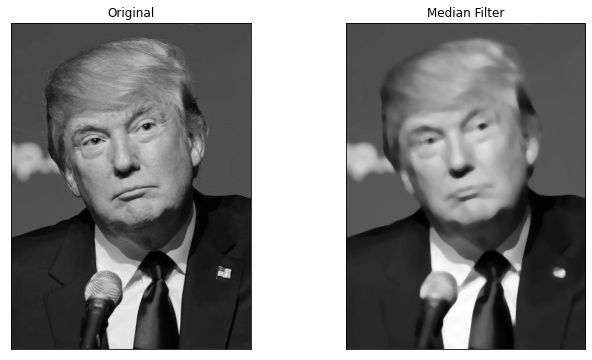

In [10]:
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

The above Figure shows that a 9 x 9 median filter can remove some of the salt and pepper noise while retaining the edges of the image.

### 4. Laplacian Filter
The Laplacian of an image highlights the areas of rapid changes in intensity and can thus be used for edge detection. If we let `I(x,y)` represent the intensities of an image then the Laplacian of the image is given by the following formula:

$$L(x,y) = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2} $$

The discrete approximation of the Laplacian at a specific pixel can be determined by taking the weighted mean of the pixel intensities in a small neighborhood of the pixel. The following figure shows two kernels which represent two different ways of approximating the Laplacian.

<img src="https://i.imgur.com/R0U8Z0W.png" width="400" class="left"> <br>

Since the Laplacian filter detects the edges of an image it can be used along with a Gaussian filter in order to first remove speckle noise and then to highlight the edges of an image. This method is referred to as the Lapalcian of Gaussian filtering. 

The `Laplacian` function from the `Open-CV` library can be used to find the Laplacian of an image.

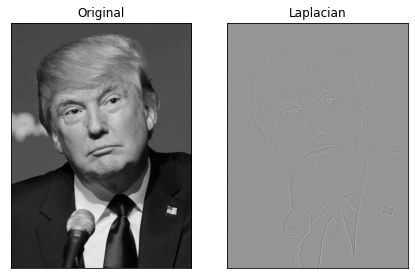

In [12]:
new_image = cv2.Laplacian(image2,cv2.CV_64F)

plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.show()

above Figure shows that while adding the Laplacian of an image to the original image may enhance the edges, some of the noise is also enhanced.

### 5. Unsharp Filter

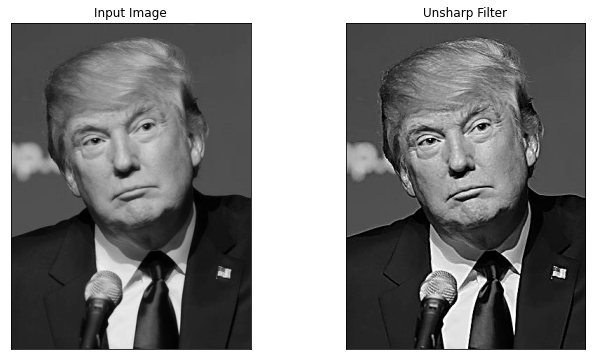

In [13]:
image2 = Image.fromarray(image2.astype('uint8'))
new_image = image2.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

Above Figure shows the results of an Unsharp filter. While the edges of the image were enhanced, some of the noise was also enhanced.<br><br>